# Dividend payout and price trend

In [58]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import datetime as dt
import calendar as cal
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from IPython.display import display
pd.options.display.max_columns = 50

## Read the high yields stock and dividends file

In [24]:
df_stocks =  pd.read_csv('../dataset/KLSE_category_2.csv')
df_dividends = pd.read_csv('../dataset/KLSE_dividends_i3investor.csv')
display(df_stocks.head(10))
display(df_dividends.head(10))

,code,name,yield_sum,yield_mean
0,5191,Tambun Indah Land Bhd (TAMB),49.69,16.5633
1,5272,Ranhill Holdings Ltd (RANH),48.11,24.0550
2,5161,JCY International Bhd (JCYI),47.34,23.6700
3,5254,Boustead Plantations Bhd (BOPL),47.29,23.6450
4,6084,Star Media Group Bhd (STAR),45.65,15.2167
5,5078,Marine & General Bhd (MARI),45.45,45.4500
6,8524,Taliworks Corporation Bhd (TWRK),42.03,21.0150
7,4502,Media Prima Bhd (MPRM),41.03,20.5150
8,5010,Tong Herr Resources Bhd (THRB),40.67,13.5567
9,3859,Magnum Bhd (MAGM),39.69,19.8450


,code,ann_date,ex_date,payment_date,dividend_type,subject,amount
0,0012,06-Nov-2017,24-Nov-2017,12-Dec-2017,DIVIDEND,First Interim Dividend,RM 0.018
1,0012,11-May-2017,23-May-2017,25-May-2017,BONUS_ISSUE,Bonus Issue,1 : 4
2,0012,15-Nov-2016,25-Nov-2016,13-Dec-2016,DIVIDEND,Interim Dividend,RM 0.018
3,0012,24-Nov-2015,16-Dec-2015,08-Jan-2016,DIVIDEND,Interim Dividend,7.0000%
4,0012,28-Nov-2014,18-Dec-2014,05-Jan-2015,DIVIDEND,Interim Dividend,7%
5,0012,29-Nov-2013,18-Dec-2013,08-Jan-2014,DIVIDEND,Interim Dividend,6%
6,0012,27-Nov-2012,21-Dec-2012,11-Jan-2013,DIVIDEND,Interim Dividend,6%
7,0012,22-Nov-2011,19-Dec-2011,10-Jan-2012,DIVIDEND,Interim Dividend,6%
8,0012,29-Nov-2010,21-Dec-2010,11-Jan-2011,DIVIDEND,Interim Dividend,6%
9,0012,17-Dec-2009,31-Dec-2009,19-Jan-2010,DIVIDEND,Interim Dividend,8%


## Join the selected stocks with their dividends

In [25]:
df_dividends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15138 entries, 0 to 15137
Data columns (total 7 columns):
code             15138 non-null object
ann_date         15138 non-null object
ex_date          15138 non-null object
payment_date     15138 non-null object
dividend_type    15138 non-null object
subject          15138 non-null object
amount           15138 non-null object
dtypes: object(7)
memory usage: 827.9+ KB


In [26]:
df_stocks_dividends = pd.merge(df_stocks, df_dividends, how='left', left_on=['code'], right_on=['code'])
df_stocks_dividends['ann_date'] = pd.to_datetime(df_stocks_dividends['ann_date'])
df_stocks_dividends.head(50)

,code,name,yield_sum,yield_mean,ann_date,ex_date,payment_date,dividend_type,subject,amount
0,5191,Tambun Indah Land Bhd (TAMB),49.69,16.5633,2018-07-03,30-Jul-2018,16-Aug-2018,DIVIDEND,Final Dividend,RM 0.047
1,5191,Tambun Indah Land Bhd (TAMB),49.69,16.5633,2017-11-22,22-Jan-2018,12-Feb-2018,DIVIDEND,First Interim Dividend,RM 0.03
2,5191,Tambun Indah Land Bhd (TAMB),49.69,16.5633,2017-07-06,24-Jul-2017,11-Aug-2017,DIVIDEND,Final Dividend,RM 0.07
3,5191,Tambun Indah Land Bhd (TAMB),49.69,16.5633,2016-11-17,24-Jan-2017,16-Feb-2017,DIVIDEND,Interim Dividend,RM 0.03
4,5191,Tambun Indah Land Bhd (TAMB),49.69,16.5633,2016-06-07,01-Aug-2016,17-Aug-2016,DIVIDEND,Final Dividend,RM 0.06
5,5191,Tambun Indah Land Bhd (TAMB),49.69,16.5633,2015-11-19,26-Jan-2016,18-Feb-2016,DIVIDEND,First Interim Dividend,RM 0.0300
6,5191,Tambun Indah Land Bhd (TAMB),49.69,16.5633,2015-06-30,01-Sep-2015,18-Sep-2015,DIVIDEND,Final Dividend,RM 0.0670
7,5191,Tambun Indah Land Bhd (TAMB),49.69,16.5633,2014-11-18,28-Jan-2015,16-Feb-2015,DIVIDEND,Interim Dividend,RM 0.03
8,5191,Tambun Indah Land Bhd (TAMB),49.69,16.5633,2014-08-19,02-Sep-2014,19-Sep-2014,DIVIDEND,Final Dividend,RM 0.046
9,5191,Tambun Indah Land Bhd (TAMB),49.69,16.5633,2013-11-19,16-Jan-2014,18-Feb-2014,DIVIDEND,Interim Dividend,RM 0.02


## Try plot the prices vs dividends dates for 1 stock

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 10 columns):
code             15 non-null object
name             15 non-null object
yield_sum        15 non-null float64
yield_mean       15 non-null float64
ann_date         15 non-null datetime64[ns]
ex_date          15 non-null object
payment_date     15 non-null object
dividend_type    15 non-null object
subject          15 non-null object
amount           15 non-null object
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 1.3+ KB


,date,close
121,2015-06-30,1.66
217,2015-11-19,1.38
352,2016-06-07,1.36
462,2016-11-17,1.46
615,2017-07-06,1.43
709,2017-11-22,1.01
856,2018-07-03,0.80


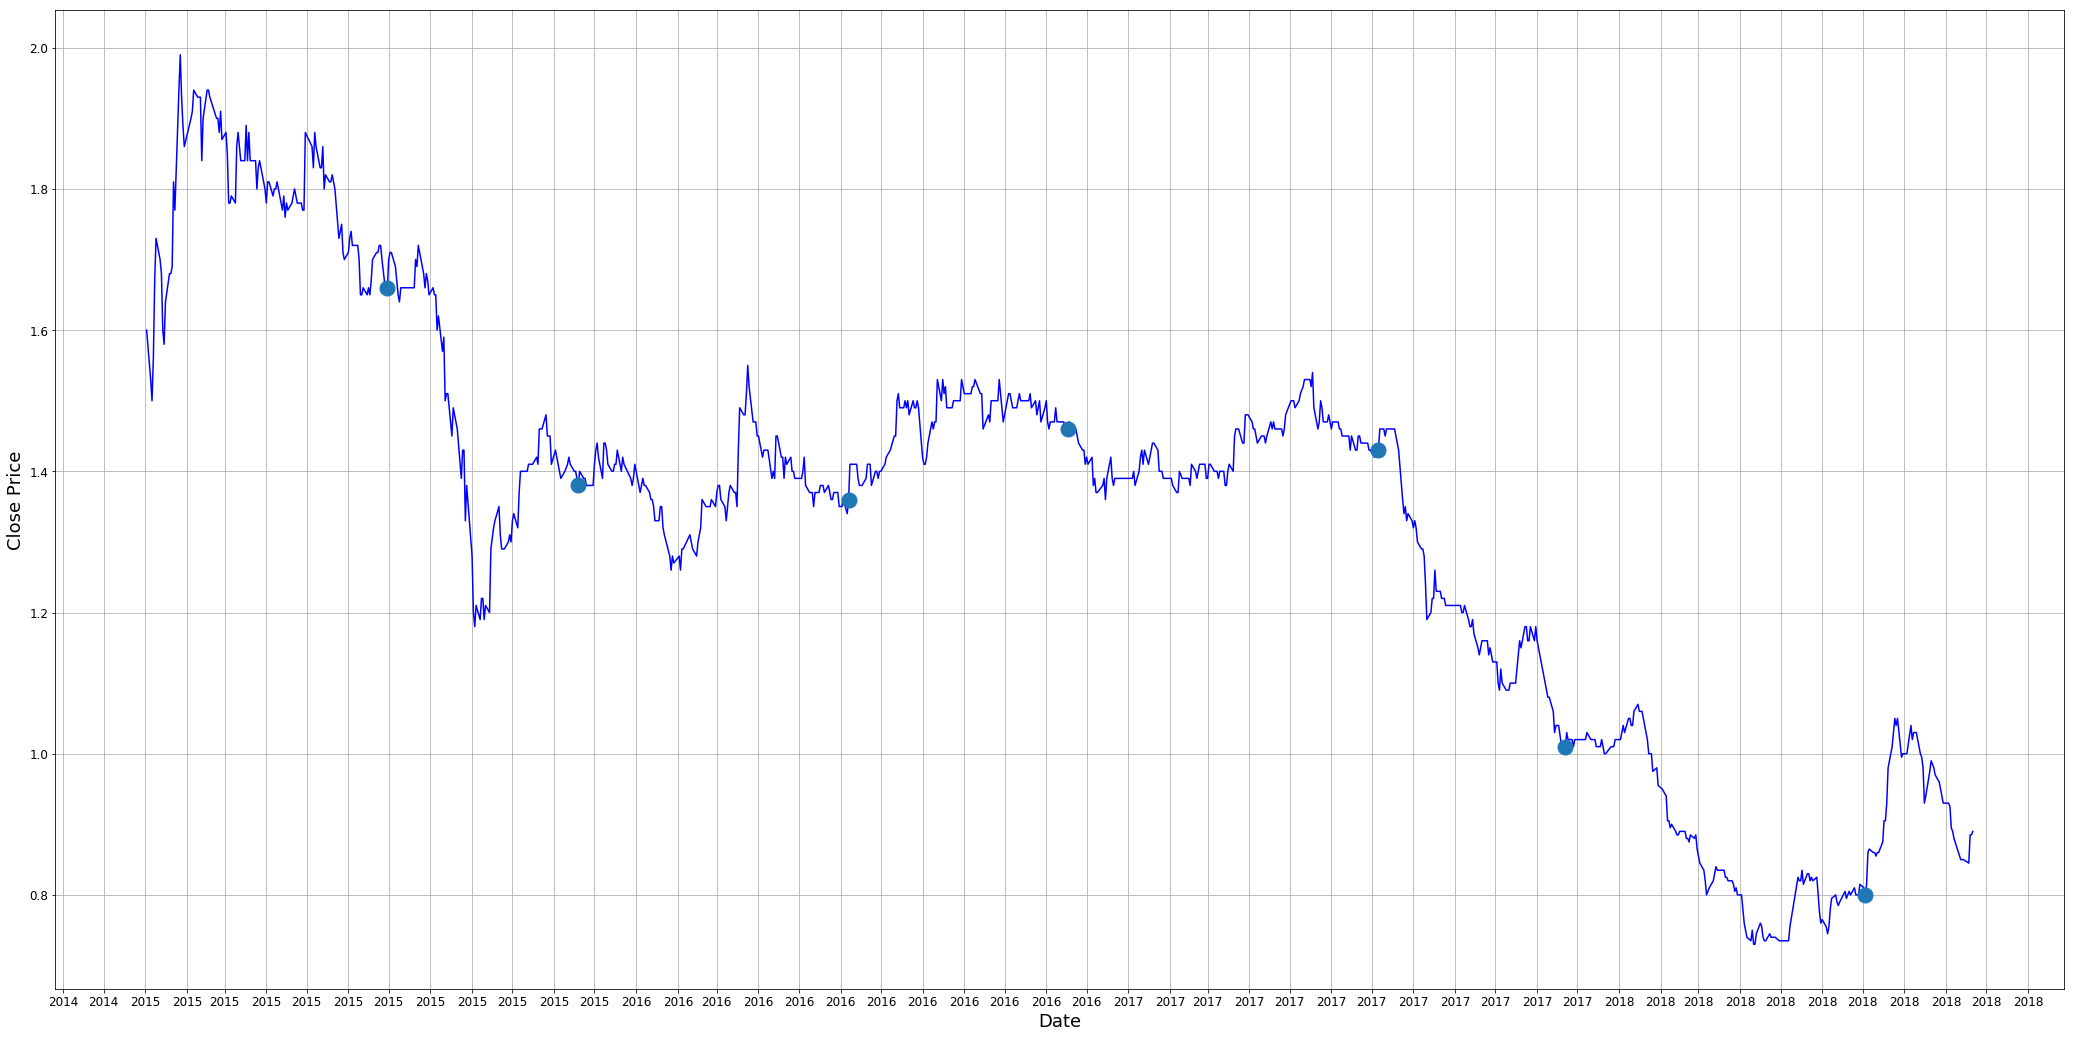

In [59]:
#!cat ../dataset/5191.csv

## Get the prices
df_prices = pd.read_csv('../dataset/5191.csv')
df_prices['date'] = pd.to_datetime(df_prices['date'])
df_prices.rename(index=str, columns={'price': 'close'}, inplace=True)
df_prices.sort_values(['date'], ascending=True, inplace=True)
df_prices.reset_index(drop=True, inplace=True)   # Reset the index starting from 1
#display(df_prices)
# df_prices.info()

## Select 2015 and above for the dividends dates
df_stock = df_stocks_dividends.loc[df_stocks_dividends['code']=='5191']
df_stock.info()
df_marker_prices = df_prices.loc[df_prices['date'].isin(df_stock['ann_date'])][['date','close']] #.set_index(['date'])
display(df_marker_prices)


plt.figure(figsize = (36,18))
#plt.plot(range(df_prices.shape[0]),df_prices['close'])
#plt.xticks(range(0,df_prices.shape[0],50),df_prices['date'].loc[::50],rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))   
plt.plot_date(df_prices['date'], df_prices['close'], 'b-')
plt.plot_date(df_marker_prices['date'], df_marker_prices['close'], marker='o', markersize=15, linewidth=15)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.grid(True)
           

# Plot marker
# df_marker_prices.plot_date(x='date', y='close')

plt.show()

In [60]:
np.zeros?

Docstring:
zeros(shape, dtype=float, order='C')

Return a new array of given shape and type, filled with zeros.

Parameters
----------
shape : int or sequence of ints
    Shape of the new array, e.g., ``(2, 3)`` or ``2``.
dtype : data-type, optional
    The desired data-type for the array, e.g., `numpy.int8`.  Default is
    `numpy.float64`.
order : {'C', 'F'}, optional
    Whether to store multidimensional data in C- or Fortran-contiguous
    (row- or column-wise) order in memory.

Returns
-------
out : ndarray
    Array of zeros with the given shape, dtype, and order.

See Also
--------
zeros_like : Return an array of zeros with shape and type of input.
ones_like : Return an array of ones with shape and type of input.
empty_like : Return an empty array with shape and type of input.
ones : Return a new array setting values to one.
empty : Return a new uninitialized array.

Examples
--------
>>> np.zeros(5)
array([ 0.,  0.,  0.,  0.,  0.])

>>> np.zeros((5,), dtype=int)
array([0, 0, 0,